In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree
#from sklearn.model_selection import cross_val_score
#from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [59]:
data1 = pd.read_csv('data/raw/20220210T003523_300-500-true-300-5000-iperf.csv')
data2 = pd.read_csv('data/raw/20220210T003523_300-5000-true-300-500-iperf.csv')
data3 = pd.read_csv('data/raw/20220210T010808_400-2000-true-400-2000-iperf.csv')
data4 = pd.read_csv('data/raw/20220210T011704_500-3000-true-500-3000-iperf.csv')
data5 = pd.read_csv('data/raw/20220210T015628_600-4000-true-600-4000-iperf.csv')
data6 = pd.read_csv('data/raw/20220210T031531_700-4000-true-700-4000-iperf.csv')
data7 = pd.read_csv('data/raw/20220210T032446_900-6000-true-900-6000-iperf.csv')
data8 = pd.read_csv('data/raw/20220210T033058_1000-7000-true-1000-7000-iperf.csv')
data9 = pd.read_csv('data/raw/20220210T063725_1100-2500-true-1100-2500-iperf.csv')

In [60]:
#Adding the packet loss ratio for each dataset
packet_ratio1 = np.ones(len(data1)) * (1/5000)
data1['packet_loss_ratio'] = packet_ratio1

packet_ratio2 = np.ones(len(data2)) * (1/500)
data2['packet_loss_ratio'] = packet_ratio2

packet_ratio3 = np.ones(len(data3)) * (1/2000)
data3['packet_loss_ratio'] = packet_ratio3

packet_ratio4 = np.ones(len(data4)) * (1/3000)
data4['packet_loss_ratio'] = packet_ratio4

packet_ratio5 = np.ones(len(data5)) * (1/4000)
data5['packet_loss_ratio'] = packet_ratio5

packet_ratio6 = np.ones(len(data6)) * (1/4000)
data6['packet_loss_ratio'] = packet_ratio6

packet_ratio7 = np.ones(len(data7)) * (1/6000)
data7['packet_loss_ratio'] = packet_ratio7

packet_ratio8 = np.ones(len(data8)) * (1/7000)
data8['packet_loss_ratio'] = packet_ratio8

packet_ratio9 = np.ones(len(data9)) * (1/2500)
data9['packet_loss_ratio'] = packet_ratio9

In [61]:
#combine datasets
data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9])
data

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs,packet_loss_ratio
0,1644453323,172.29.0.3,35504,172.28.0.2,5001,6,13664,60,11,1,1644453323671;1644453323671;1644453323671;1644...,60;52;112;1500;1500;1500;1500;1500;1500;1500;1...,2;1;1;1;1;1;1;1;1;1;1;1;,0.0002
1,1644453324,172.29.0.3,35504,172.28.0.2,5001,6,90000,1456,60,28,1644453324276;1644453324276;1644453324276;1644...,52;1500;1500;52;52;52;52;52;52;52;52;52;1500;1...,2;1;1;2;2;2;2;2;2;2;2;2;1;1;1;1;1;1;1;1;1;1;1;...,0.0002
2,1644453325,172.29.0.3,35504,172.28.0.2,5001,6,120000,1768,80,34,1644453325516;1644453325516;1644453325516;1644...,52;1500;1500;52;52;52;52;52;52;52;52;52;52;52;...,2;1;1;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;...,0.0002
3,1644453326,FE80::3869:2BFF:FECA:C0EC,0,FF02::2,0,58,56,0,1,0,1644453326072;,56;,1;,0.0002
4,1644453326,172.29.0.3,35504,172.28.0.2,5001,6,680496,7436,454,143,1644453326128;1644453326128;1644453326128;1644...,52;1500;1500;52;52;52;52;52;52;52;52;52;52;150...,2;1;1;2;2;2;2;2;2;2;2;2;2;1;1;1;1;1;1;1;1;1;1;...,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1644475274,192.168.224.3,59006,192.168.208.2,5001,6,1927500,32188,1285,619,1644475274187;1644475274187;1644475274187;1644...,52;1500;1500;1500;1500;1500;1500;1500;1500;150...,2;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;...,0.0004
187,1644475275,192.168.224.3,59006,192.168.208.2,5001,6,0,260,0,5,1644475275377;1644475275382;1644475275504;1644...,52;52;52;52;52;,2;2;2;2;2;,0.0004
188,1644475276,192.168.224.3,59006,192.168.208.2,5001,6,2597276,20332,1733,391,1644475276392;1644475276399;1644475276399;1644...,52;52;52;52;52;52;52;52;52;52;52;52;52;52;52;5...,2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;...,0.0004
189,1644475277,192.168.224.3,59006,192.168.208.2,5001,6,1500,2780,1,52,1644475277009;1644475277009;1644475277009;1644...,52;52;52;52;52;52;52;52;52;52;52;52;52;52;52;5...,2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;...,0.0004


# Features

In [62]:
# Feature 1: Maximum Packet Size for each interaction
def max_size(x):
    """
    Helper function used to add max packet size feature
    """
    nums = x.split(';')[:-1]
    nums_int = list(map(int, nums))
    return max(nums_int)

In [63]:
# Feature 2: Range of Packet Size for each interaction
def range_size(x):
    """
    Helper function used to add range of packet size feature
    """
    nums = x.split(';')[:-1]
    nums_int = list(map(int, nums))
    return max(nums_int) - min(nums_int)

In [64]:
# Feature 3: Average of Packet Size for each interaction
def avg_size(x):
    """
    Helper function used to add average packet size feature
    """
    nums = x.split(';')[:-1]
    numsInt = list(map(int, nums))
    return np.mean(numsInt)

In [65]:
# Feature 4: Average Packet Duration
def packet_dur(x):
    """
    Helper function used to add longest packet duration feature
    """
    return np.mean(np.diff(list(map(int, x.split(';')[-2]))))
    #nums = x.split(';')[:-2]
    #numsInt = list(map(int, nums))
    #return np.mean(np.diff(numsInt))

In [66]:
# Feature 5: Total packet Direction
def total_packet_dir(x):
    """
    Helper function used to add total packet direction feature
    """
    dirs = x.split(';')[:-1]
    totalDirs = 0

    for i in dirs:
        if i == '1':
            totalDirs += 1
        elif i == '2':
            totalDirs -= 1

    return totalDirs

In [67]:
# Feature 6: total packets -> Done in apply_features()
# Feature 7: total bytes -> Done in apply_features()

In [68]:
# Feature 8: Interaction length
def interaction_length(x):
    """
    Helper function used to add interaction length feature
    """
    times = x.split(';')[:-1]
    times2 = list(map(int, times))
    startTime = min(times2)
    endTime = max(times2)

    return endTime - startTime

In [69]:
# Feature 9: total packets over time ratio -> Done in apply_features()
# Feature 10: total bytes over time ratio -> Done in apply_features()

In [108]:
# Convert packet loss ratio into categorical values
def ratio_to_category(x):
    if x == (1/5000):
        return "a"
    elif x == (1/500):
        return "b"
    elif x == (1/2000):
        return "c"
    elif x == (1/3000):
        return "d"
    elif x == (1/4000):
        return "e"
    elif x == (1/4000):
        return "f"
    elif x == (1/6000):
        return "g"
    elif x == (1/7000):
        return "h"
    elif x == (1/2500):
        return "i"

In [109]:
def apply_features(df):
    """
    Takes in a raw dataframe from etl.py and 
    applys all the custom features into one dataframe
    """
    df['max_packet_size'] = df['packet_sizes'].apply(max_size)
    df['range_packet_size'] = df['packet_sizes'].apply(range_size)
    df['avg_packet_size'] = df['packet_sizes'].apply(avg_size)
    df['avg_packet_dur'] = df['packet_times'].apply(packet_dur)
    df['total_packet_dir'] = df['packet_dirs'].apply(total_packet_dir)
    df['total_packets'] = df['1->2Pkts'] + df['2->1Pkts']
    df['total_bytes'] = df['1->2Bytes'] + df['2->1Bytes']
    df['interaction_length'] = df['packet_times'].apply(interaction_length)
    df['packets_time_ratio'] = df['total_packets'] / df['interaction_length']
    df['bytes_time_ratio'] = df['total_bytes'] / df['interaction_length']
    df['packet_loss_ratio_class'] = df['packet_loss_ratio'].apply(ratio_to_category)

In [110]:
#apply feature engineering
apply_features(data)

In [111]:
def modify(x):
    if x == float('inf'):
        return 0
    else:
        return x

In [112]:
data['packets_time_ratio'] = data['packets_time_ratio'].apply(modify)
data['bytes_time_ratio'] = data['bytes_time_ratio'].apply(modify)

In [113]:
features_list = ['max_packet_size', 'range_packet_size', 'avg_packet_size', 'avg_packet_dur', 'total_packet_dir',
                'total_packets', 'total_bytes', 'interaction_length', 'packets_time_ratio', 'bytes_time_ratio']

# Linear Regresesion Model

In [79]:
def linear_regression(df, features_list, y = "packet_loss_ratio"):
    # Load the dataset
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    return r2_score(y_test.reset_index(drop=True), y_pred), y_test.reset_index(drop=True), y_pred

In [125]:
# run model
results = []
for i in range(100):
    results.append(linear_regression(data, features_list))

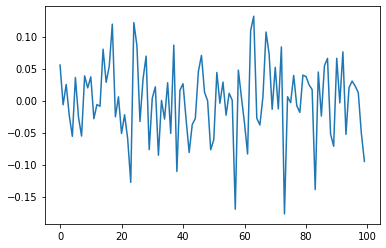

In [81]:
# (coefficient of determination) regression score function
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

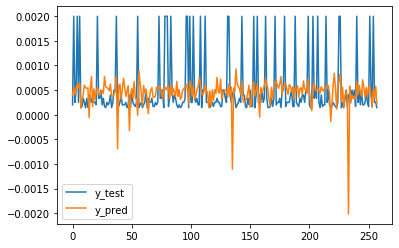

In [84]:
# prection values vs true values
result = linear_regression(data, features_list)
plt.plot(result[1])
plt.plot(result[2])
plt.legend(["y_test", "y_pred"])

# Decision Trees Model

In [115]:
def decision_tree(df, features_list, y = "packet_loss_ratio_class"):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = tree.DecisionTreeClassifier()

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), y_test.reset_index(drop=True), y_pred

In [116]:
# run model
results = []
for i in range(100):
    results.append(decision_tree(data, features_list))

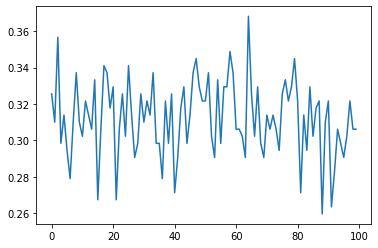

In [117]:
# mean training accuracy
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

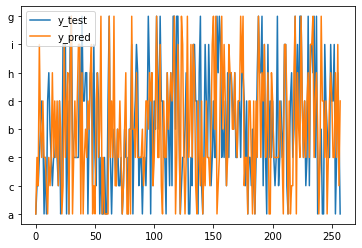

In [120]:
# prection values vs true values
result = decision_tree(data, features_list)
plt.plot(result[1])
plt.plot(result[2])
plt.legend(["y_test", "y_pred"])

# SVM Model

In [121]:
def svm(df, features_list, y = "packet_loss_ratio_class"):
    # Load the dataset 'packet_sizes_var', "Time"
    features = features_list
    df_X = df[features]
    df_y = df[y]

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

    # Train the model using the training sets
    clf = clf.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    
    return clf.score(X_test, y_test.reset_index(drop=True)), y_test.reset_index(drop=True), y_pred

In [122]:
# run model
results = []
for i in range(100):
    results.append(svm(data, features_list))

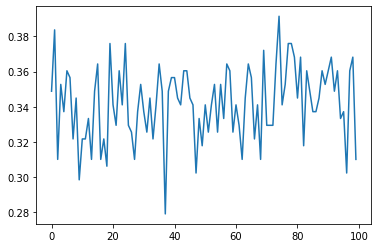

In [123]:

scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

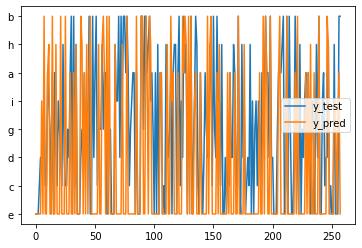

In [124]:
result = svm(data, features_list)
plt.plot(result[1])
plt.plot(result[2])
plt.legend(["y_test", "y_pred"])